In [1]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,mean_squared_error,precision_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,IsolationForest
import seaborn as sns
from keras import Sequential
from keras.layers import Dense,LeakyReLU
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

In [2]:
df=pd.read_csv("C:\\Users\\acer\\Documents\\heart.csv")
df.sample(10,random_state=42)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
377,65,M,ASY,160,0,1,ST,122,N,1.2,Flat,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up,0
793,67,M,ASY,125,254,1,Normal,163,N,0.2,Flat,1
363,56,M,ASY,120,0,0,ST,148,N,0.0,Flat,1
583,69,M,NAP,142,271,0,LVH,126,N,0.3,Up,0
165,46,M,TA,140,272,1,Normal,175,N,2.0,Flat,1
483,58,M,ASY,120,0,0,LVH,106,Y,1.5,Down,1


In [3]:
df.shape

(918, 12)

In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [9]:
{col:list(df[col].unique()) for col in [i for i in df.columns if df[i].dtype=='object']}

{'Sex': ['M', 'F'],
 'ChestPainType': ['ATA', 'NAP', 'ASY', 'TA'],
 'RestingECG': ['Normal', 'ST', 'LVH'],
 'ExerciseAngina': ['N', 'Y'],
 'ST_Slope': ['Up', 'Flat', 'Down']}

In [10]:
plt.style.use('seaborn-v0_8')

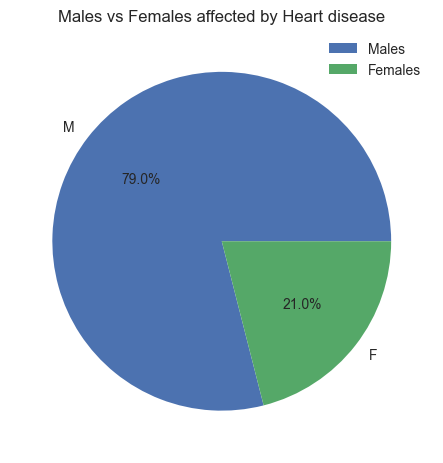

In [11]:
plt.pie(df['Sex'].value_counts(),labels=df['Sex'].unique(),autopct='%1.1f%%')
plt.title('Males vs Females affected by Heart disease')
plt.legend(['Males','Females'])
plt.show()

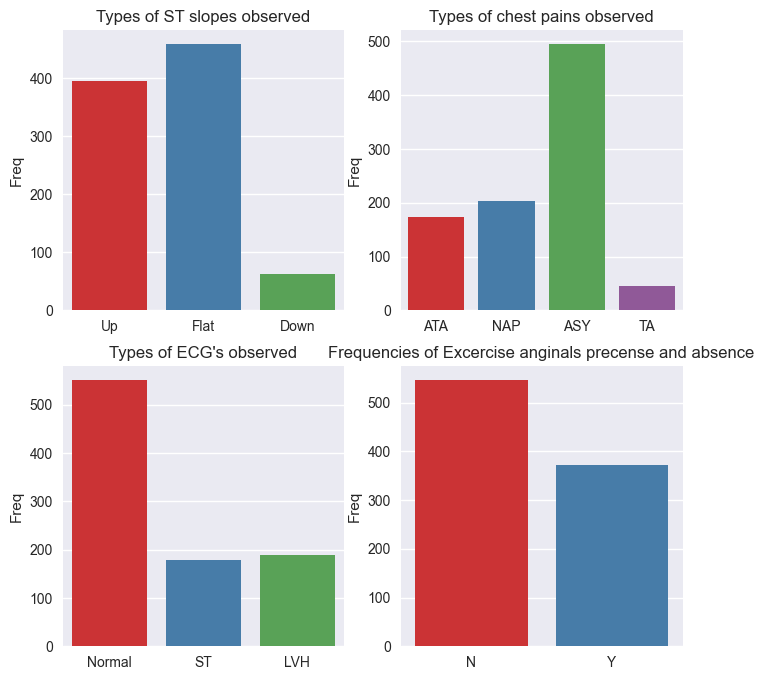

In [12]:
plt.figure(figsize=(8,8))
#### subplots for each plot
plt.subplot(2,2,1)
sns.countplot(x=df['ST_Slope'],data=df,hue=df['ST_Slope'],palette='Set1')
plt.title('Types of ST slopes observed')
plt.xlabel('')
plt.ylabel('Freq')
plt.subplot(2,2,2)
sns.countplot(x=df['ChestPainType'],data=df,hue=df['ChestPainType'],palette='Set1')
plt.title('Types of chest pains observed')
plt.xlabel('')
plt.ylabel('Freq')
plt.subplot(2,2,3)
sns.countplot(x=df['RestingECG'],data=df,hue=df['RestingECG'],palette='Set1')
plt.title("Types of ECG's observed")
plt.xlabel('')
plt.ylabel('Freq')
plt.subplot(2,2,4)
sns.countplot(x=df['ExerciseAngina'],data=df,hue=df['ExerciseAngina'],palette='Set1')
plt.title('Frequencies of Excercise anginals precense and absence')
plt.xlabel('')
plt.ylabel('Freq')
plt.show()

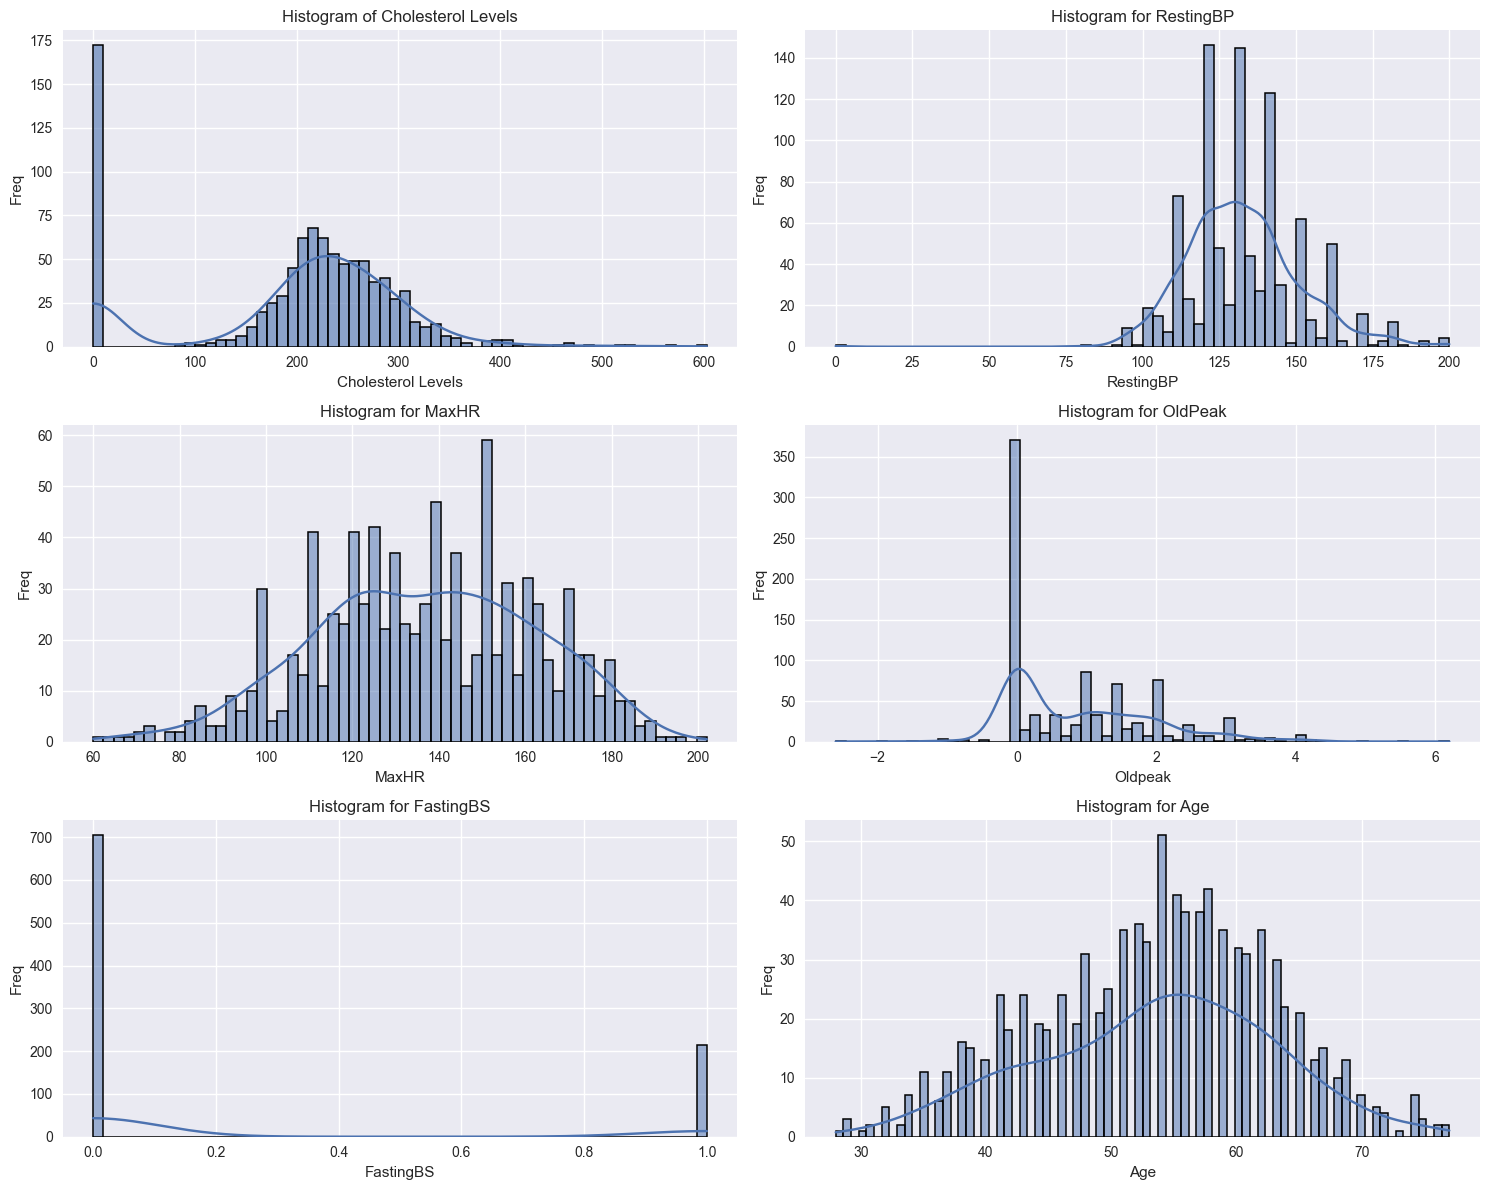

In [13]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
sns.histplot(x=df['Cholesterol'], bins=60, alpha=0.6,kde=True, edgecolor='black', linewidth=1.1)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Freq')
plt.title('Histogram of Cholesterol Levels')

plt.subplot(3,2,2)
sns.histplot(x=df['RestingBP'],bins=60,kde=True,edgecolor='black',linewidth=1.1)
plt.title('Histogram for RestingBP')
plt.ylabel('Freq')

plt.subplot(3,2,3)
sns.histplot(x=df['MaxHR'],bins=60,linewidth=1.1,edgecolor='black',kde=True)
plt.title('Histogram for MaxHR')
plt.ylabel('Freq')

plt.subplot(3,2,4)
sns.histplot(x=df['Oldpeak'],bins=60,linewidth=1.1,edgecolor='black',kde=True)
plt.title('Histogram for OldPeak')
plt.ylabel('Freq')

plt.subplot(3,2,5)
sns.histplot(x=df['FastingBS'],bins=60,linewidth=1.1,edgecolor='black',kde=True)
plt.title('Histogram for FastingBS')
plt.ylabel('Freq')

plt.subplot(3,2,6)
sns.histplot(x=df['Age'],bins=80,linewidth=1.1,edgecolor='black',kde=True)
plt.title('Histogram for Age')
plt.ylabel('Freq')
plt.tight_layout()
plt.show()


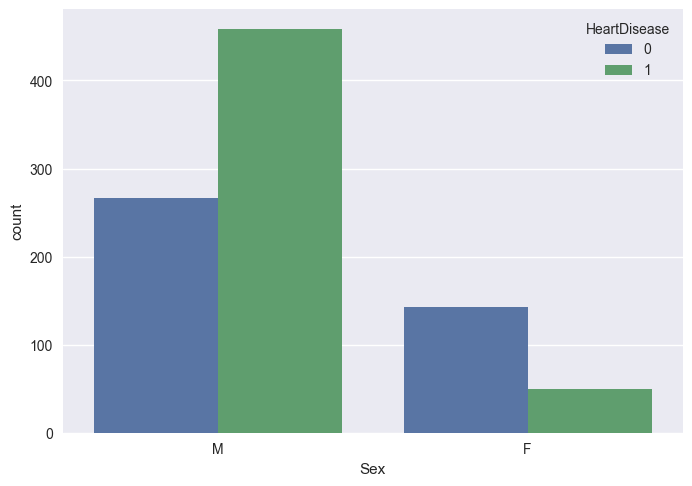

In [14]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])
plt.show()

### To make predictions on the patient wether he may have a chance to experience a heart failure we need to consider every parameter available.

In [15]:
cat_attr=['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina', 'ST_Slope']
df=pd.get_dummies(data=df,prefix=cat_attr,columns=cat_attr)

In [16]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
1,49,160,180,156,1.0,1,True,False,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,98,0.0,0,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
3,48,138,214,108,1.5,1,True,False,True,False,...,True,False,False,True,False,False,True,False,True,False
4,54,150,195,122,0.0,0,False,True,False,False,...,True,False,False,True,False,True,False,False,False,True


In [17]:
y=df['HeartDisease']
X=df.drop('HeartDisease',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
print(X.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   MaxHR              918 non-null    int64  
 4   Oldpeak            918 non-null    float64
 5   Sex_F              918 non-null    bool   
 6   Sex_M              918 non-null    bool   
 7   ChestPainType_ASY  918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  FastingBS_0        918 non-null    bool   
 12  FastingBS_1        918 non-null    bool   
 13  RestingECG_LVH     918 non-null    bool   
 14  RestingECG_Normal  918 non-null    bool   
 15  RestingECG_ST      918 non-null    bool   
 16  ExerciseAngina_N   918 non

## Logistic Regression model

In [19]:
#### standardize the data for logistic Regression model
standardized_df=pd.DataFrame()
scaler=StandardScaler()
numerical_attr=[x for x in df.columns if df[x].nunique()>2]
cat_attr=[x for x in df.columns if df[x].nunique()==2]
standardized_df[numerical_attr]=scaler.fit_transform(df[numerical_attr])
standardized_df[cat_attr]=df[cat_attr]
y_log=standardized_df['HeartDisease']
X_log=standardized_df.drop('HeartDisease',axis=1)
x_log_train,x_log_test,y_log_train,y_log_test=train_test_split(X_log,y_log,train_size=0.8,random_state=42)
model=LogisticRegression()
model.fit(x_log_train,y_log_train)
y_log_train_pred=model.predict(x_log_train)
y_log_test_pred=model.predict(x_log_test)

print(f"Training accuracy:{accuracy_score(y_log_train,y_log_train_pred)}")
print(f"Testing accuracy:{accuracy_score(y_log_test,y_log_test_pred)}")

Training accuracy:0.8719346049046321
Testing accuracy:0.8532608695652174


## Support vector machine *_*

In [20]:
model=SVC(kernel='linear',C=2,random_state=42) ## linear plane is generated as a classification boundary
model.fit(x_train,y_train)

SVC(C=2, kernel='linear', random_state=42)

In [21]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

print(f"testing accuracy:{accuracy_score(y_test,y_test_pred)}")
print(f"train accuracy:{accuracy_score(y_train,y_train_pred)}")

test acc:0.8532608695652174
train acc:0.8801089918256131


## Descision tree(default)

In [22]:
######## base decision tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)
print(f"Training accuracy:{accuracy_score(y_train,y_train_pred)}")
print(f"Testing accuracy:{accuracy_score(y_test,y_test_pred)}")

Training accuracy:1.0
Testing accuracy:0.7880434782608695


## Model is overfitting so lets try tuning on hyperparameters using GridSearchCV

In [23]:
####### lets try gridsearchcv
params={
       'max_depth':[1,2,4,5,6,7,10,15],
       'min_samples_leaf':[2,10,20,40,50,70,140,150,200],
       'min_samples_split':[2,10,20,40,50,70,140,150,200]
}
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='accuracy')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_) 

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8554979637171419


In [24]:
##### using the parameters on test data 
model=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,min_samples_split=2)
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print(f"training acuracy:{accuracy_score(y_train,y_train_pred)}")
print(f"testing accuracy:{accuracy_score(y_test,y_test_pred)}") 

training acuracy:0.8678474114441417
testing accuracy:0.8586956521739131


## hyperparameter tuning manually

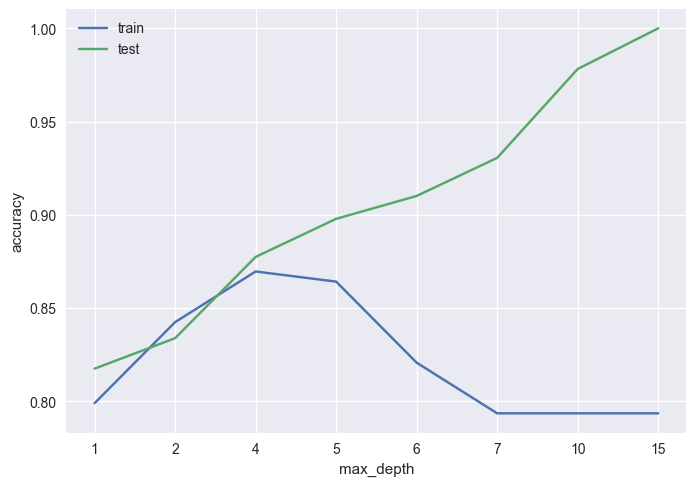

In [25]:

depths=[1,2,4,5,6,7,10,15]
min_split=[2,10,20,40,50,70,140,150,200]
min_leaf=[2,10,20,40,50,70,140,150,200]

accuracy_train=[]
accuracy_test=[]

for i in depths:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(depths)),labels=depths)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["train","test"])
plt.show()  

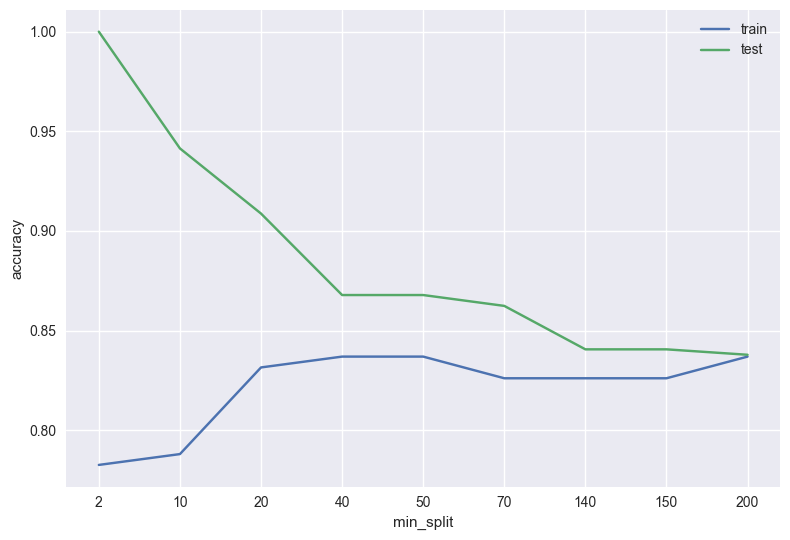

In [26]:
accuracy_train=[]
accuracy_test=[]
for i in min_split:
    model=DecisionTreeClassifier(min_samples_split=i)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))


plt.xticks(ticks=range(len(min_split)),labels=min_split)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.legend(["train","test"])
plt.xlabel('min_split')
plt.ylabel('accuracy')
plt.tight_layout()
plt.show()    
####### from this plot at 150 the train accuracy reaches peak but model is overfitting. so most optimal parameter is 50


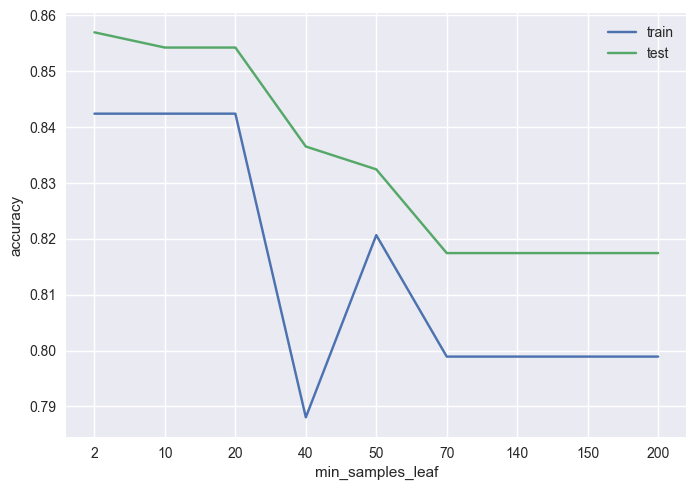

In [27]:
accuracy_train=[]
accuracy_test=[]
for i in min_leaf:
    model=DecisionTreeClassifier(min_samples_leaf=i,min_samples_split=50,max_depth=4)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(min_leaf)),labels=min_leaf)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.legend(["train","test"])
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.show()    

## Decision tree with optimal hyperparamters 

In [28]:
####now training the model again on the optimal hyperparameters

model_optimal=DecisionTreeClassifier(min_samples_leaf=15,min_samples_split=50,max_depth=5)
model_optimal.fit(x_train,y_train)
y_test_pred=model_optimal.predict(x_test)
y_train_pred=model_optimal.predict(x_train)
print(f"train accuracy:{accuracy_score(y_train,y_train_pred)}")
print(f"test accuracy:{accuracy_score(y_test,y_test_pred)}")

train accuracy:0.8555858310626703
test accuracy:0.8641304347826086


## Again trying grid search cv on Random forest model

In [29]:

rfmodel=RandomForestClassifier()
params={'max_depth':[1,2,4,5,6,7,10,15],
'min_samples_split':[2,10,20,40,50,70,140,150,200],
'min_samples_leaf':[2,10,20,40,50,70,140,150,200],
'n_estimators':[10,40,50,90,100,200,300]}

grid=GridSearchCV(rfmodel,param_grid=params,scoring='accuracy',cv=10)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_) 

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8554979637171419


## Manual search for optimal Hyperparameters

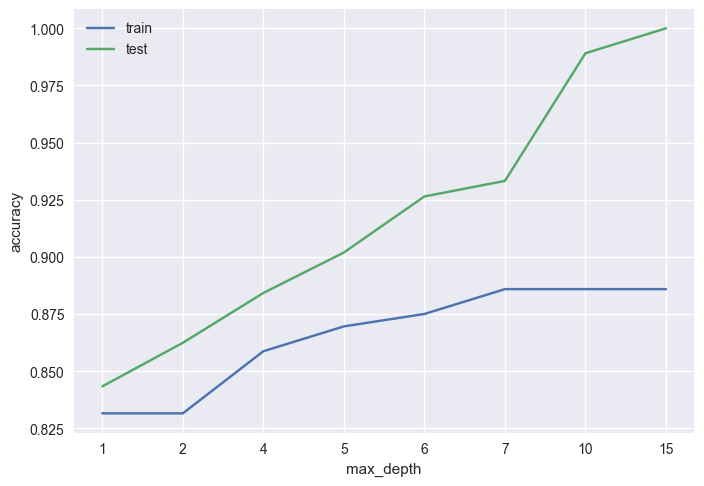

In [30]:

accuracy_train=[]
accuracy_test=[]
for i in depths:
    model=RandomForestClassifier(max_depth=i)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(depths)),labels=depths)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["train","test"])
plt.show() 

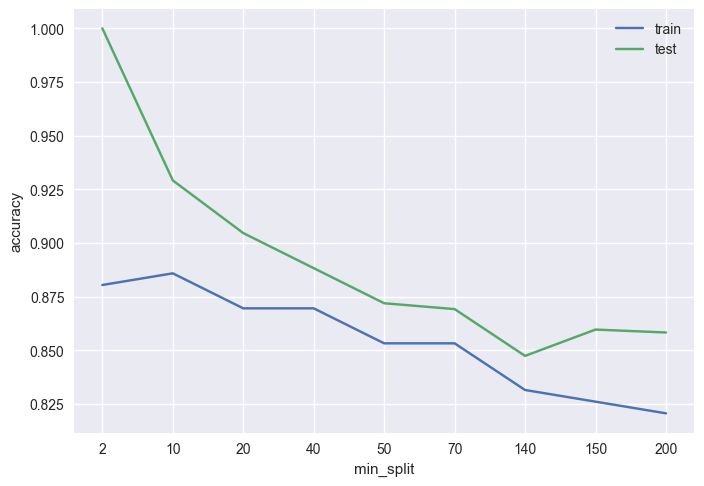

In [31]:
accuracy_train=[]
accuracy_test=[]
for i in min_split:
    model=RandomForestClassifier(min_samples_split=i)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(min_split)),labels=min_split)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.xlabel('min_split')
plt.ylabel('accuracy')
plt.legend(["train","test"])
plt.show() 

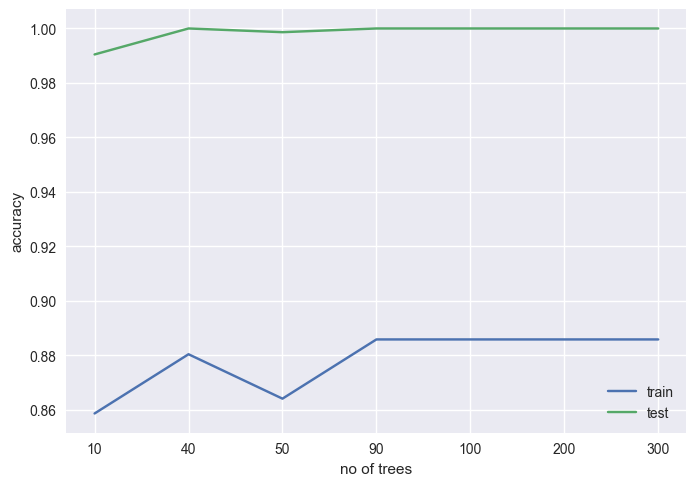

In [32]:
accuracy_train=[]
accuracy_test=[]

no_of_trees=[10,40,50,90,100,200,300]
for i in no_of_trees:
    model=RandomForestClassifier(n_estimators=i)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(no_of_trees)),labels=no_of_trees)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.xlabel('no of trees')
plt.ylabel('accuracy')
plt.legend(["train","test"])
plt.show() 


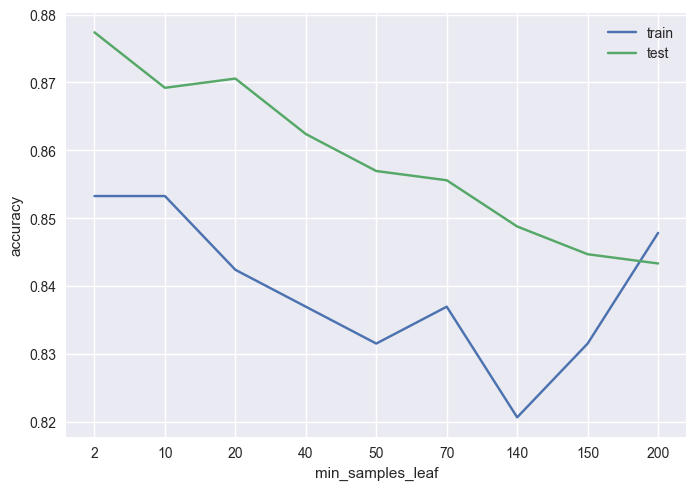

In [33]:
accuracy_train=[]
accuracy_test=[]
for i in min_leaf:
    model=RandomForestClassifier(min_samples_leaf=i,min_samples_split=50,max_depth=4,n_estimators=200)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    
plt.xticks(ticks=range(len(min_leaf)),labels=min_leaf)    
plt.plot(accuracy_test)
plt.plot(accuracy_train)
plt.legend(["train","test"])
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.show()   

## Random forest with optimal hyperparameters

In [34]:
##### optimal random forest
rfmodel=RandomForestClassifier(min_samples_split=10,max_depth=15,n_estimators=200,min_samples_leaf=2)
rfmodel.fit(x_train,y_train)
y_train_pred=rfmodel.predict(x_train)
y_test_pred=rfmodel.predict(x_test)
print(f"Training accuracy:{accuracy_score(y_train,y_train_pred)}")
print(f"Testing accuracy:{accuracy_score(y_test,y_test_pred)}")

Training accuracy:0.9196185286103542
Testing accuracy:0.8804347826086957


## XGboost owo

In [39]:
model=XGBClassifier(n_estimators=100,random_state=42,max_depth=15,reg_lambda=0,colsample_bynode=0.9)
## after running with different paramters multiple times i selected the most optimal hyperparameters
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.9,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

print(f"training accuracy:{accuracy_score(y_train,y_train_pred)}")
print(f"testing accuracy:{accuracy_score(y_test,y_test_pred)}")


training accuracy:1.0
testing accuracy:0.8967391304347826


## Basic Neural network

In [35]:
model=Sequential([
    Dense(10,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(8,activation=LeakyReLU(alpha=0.2)),
    Dense(5,activation=LeakyReLU(alpha=0.2)),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=15,epochs=100,verbose=1)
loss,NN_test_accuracy=model.evaluate(x_test,y_test)
loss,NN_train_accuracy=model.evaluate(x_train,y_train)


C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3797 - loss: 13.9394
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4355 - loss: 1.3323
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3756 - loss: 1.1046
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4236 - loss: 0.8758
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5253 - loss: 0.7426
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.6357
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.5944
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.5727
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7413 - loss: 0.5393
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.5286
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 0.5115
Epoch 12/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [36]:
print(f"Train accuracy:{NN_train_accuracy}")
print(f"Test accuracy:{NN_test_accuracy}")

Train accuracy:0.8719345927238464
Test accuracy:0.8478260636329651


## Results
- Logistic Regression-> train accuracy:87.1% and test accuracy:85.3%
- Descision tree-> train accuracy:85.5% and test accuracy:86.4%
- Random Forest-> train accuracy:92.5% and test accuracy:88.5%
- Base Neural network-> train accuracy:85.3% and test accuracy:87.5%
- XGBoost-> train accuracy:100% and test accuracy:89.6%
- Support Vector Machine(classifier)-> train accuracy:85.3% and test accuracy:88% 
 #### i have'nt yet learned deeplearning advanced so i will come again to add a much better **Neural network** too. So for now XGBoost is the winner 😁

In [37]:
joblib.dump(rfmodel,"model.pkl") #####  saving the model in pickle format

['model.pkl']

# -----------------------------THE END (#gulabi dil❤️)-----------------------------------